In [1]:
#!/usr/bin/env python
from __future__ import print_function
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import random


# Hyperparameters for our network

In [2]:
input_size = 1
hidden_sizes = 50
output_size = 1
lr=0.01
batch_size=100
total_samples=10000
epochs=2000

# Data Setup ( function chosen x^2)

In [3]:
### target function activation ###    
def square_activation(x):
    return pow(x,2)

############# Our target function and x values #########
x_values = np.linspace(0,10,total_samples)
y = [square_activation(x) for x in x_values]

#### getting batches #####
def get_batch(batch_size=32,x_values=x_values,y=y):
    """Builds a batch i.e. (x, f(x)) pair."""
    sampled_index=random.sample(list(enumerate(x_values)), batch_size)
    x_ran=[x_values[idx] for idx,val in sampled_index]
    y_ran=[y[idx] for idx,val in sampled_index]
    x_ran=torch.FloatTensor(x_ran)
    y_ran=torch.FloatTensor(y_ran)
    return x_ran.reshape(x_ran.shape[0],1), y_ran.reshape(y_ran.shape[0],1)

# Define model

In [4]:
model = torch.nn.Sequential(torch.nn.Linear(input_size, hidden_sizes),
                      torch.nn.ReLU(),
                      torch.nn.Linear(hidden_sizes, output_size))

optimizer = torch.optim.SGD(model.parameters(), lr=lr)

# Model Run

In [5]:
for batch_idx in range(epochs): #infinite loop
    batch_x, batch_y = get_batch(batch_size,x_values,y)
    
    # Reset gradients to zero for each batch before starting calculation for gradient
    optimizer.zero_grad()

    # Forward pass
    output = F.smooth_l1_loss(model(batch_x), batch_y) #calculating error- Function that uses a squared term if the absolute element-wise error falls below beta and an L1 term otherwise.
    loss = output.item()

    # Backward pass
    output.backward()

    # Apply gradients
    optimizer.step()

print('Loss: {:.6f} after {} batches'.format(loss, batch_idx))

Loss: 1.288260 after 1999 batches


# prediction and plot against original

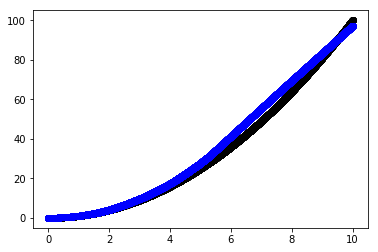

In [6]:
###### prediction #####
x_pred=torch.FloatTensor(x_values)
x_pred=x_pred.reshape(x_pred.shape[0],1)
y_pred=model(x_pred).detach().numpy()

### Error Plot
plt.figure()
plt.plot(x_values, y, 'o', color='black')
plt.plot(x_values, y_pred, 'o', color='blue')